# Import Modules

In this notebook, we aim to introduce clustering modules from RiskLabAI.

In [1]:
import seaborn as sns
import pandas as pd
import yfinance as yf
from RiskLabAI.cluster.clustering import (
    covariance_to_correlation,
    cluster_k_means_base,
    cluster_k_means_top,
    random_block_covariance,
    random_block_correlation
)

# Data

Generates a dataframe of popular symbols with datatime indices and symbols as columns.

Each value is the difference between the price of the symbol at the time of the index and the price of the symbol at the previous index.
By considering that the first row doesn't have a previous index, the first row will have NaN values.

The source of the data is Yahoo Finance.

In [2]:
all_stocks = pd.DataFrame()
symbols = [
    "AAPL",
    "MSFT",
    "GOOG",
    "AMZN",
    "TSLA",
    "META",
    "JPM",
    "UNH",
    "V",
    "JNJ",
    "HD",
    "WMT",
    "PG",
    "BAC",
    "MA",
    "PFE",
    "DIS",
    "AVGO",
    "XOM",
    "ACM",
    "CSCO",
    "NFLX",
    "NKE",
    "LLY",
    "KO",
    "TMO",
    "CRM",
    "COST",
    "AAL",
    "X",
]
for symbol in symbols:
    data = pd.Series(
        yf.Ticker(symbol).history(start="2019-01-01", end="2021-08-08")["Close"],
        name=symbol,
    )
    if symbol == symbols[0]:
        all_stocks = pd.DataFrame(data)
    else:
        all_stocks[symbol] = data
all_stocks = all_stocks.pct_change(1)
all_stocks.head(4)

,AAPL,MSFT,GOOG,AMZN,TSLA,META,JPM,UNH,V,JNJ,...,CSCO,NFLX,NKE,LLY,KO,TMO,CRM,COST,AAL,X
Date,,,,,,,,,,,,,,,,,,,,,
2019-01-02 00:00:00-05:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-01-03 00:00:00-05:00,-0.099607,-0.036788,-0.028484,-0.025241,-0.031472,-0.029039,-0.014212,-0.027270,-0.036037,-0.015890,...,-0.036368,0.013226,-0.017689,-0.031076,-0.006179,-0.033041,-0.037993,-0.021196,-0.074507,-0.001621
2019-01-04 00:00:00-05:00,0.042689,0.046509,0.053786,0.050064,0.057697,0.047138,0.036866,0.011695,0.043081,0.016783,...,0.045045,0.097234,0.026117,0.030096,0.019940,0.045199,0.057976,0.029039,0.065868,0.100649
2019-01-07 00:00:00-05:00,-0.002226,0.001275,-0.002167,0.034353,0.054361,0.000725,0.000695,0.001920,0.018032,-0.006415,...,0.006757,0.059717,0.014334,0.005407,-0.013034,0.013483,0.030878,0.003685,0.028402,0.005408


# Snippet 4-1

The first cell is calculating the correlation matrix for the symbols in the dataframe.
What the first cell does is equivalent to computing correlation with the following code:
```python
correlation = all_stocks.corr()
```
The second cell is using the cluster_k_means_base function to cluster the symbols based on their rows in the correlation matrix.

In [3]:
covariance = all_stocks.cov()
correlation = covariance_to_correlation(covariance)

In [4]:
correlationNew, clusters, silhouette = cluster_k_means_base(correlation)
clusters

{0: ['AAPL',
  'MSFT',
  'GOOG',
  'META',
  'JPM',
  'UNH',
  'V',
  'JNJ',
  'HD',
  'WMT',
  'PG',
  'BAC',
  'MA',
  'PFE',
  'DIS',
  'AVGO',
  'XOM',
  'ACM',
  'CSCO',
  'NKE',
  'LLY',
  'KO',
  'TMO',
  'CRM',
  'COST'],
 1: ['AMZN', 'TSLA', 'NFLX', 'AAL', 'X']}

# Snippet 4-2

The following function computes clustering using the cluster_k_means_base function and tries to recompute the clustering of clusters with an average silhouette score less than the overall average using the make_new_outputs function, which merges two disjoint clusters.

If the result has a better overall silhouette score, it will be used as the new clustering; otherwise, the original clustering will be returned.

In [5]:
corr, clusters, silhouette = cluster_k_means_top(correlation, max_clusters=None, iterations=10)
clusters

{0: ['AAPL',
  'MSFT',
  'GOOG',
  'AMZN',
  'META',
  'UNH',
  'V',
  'JNJ',
  'HD',
  'WMT',
  'PG',
  'MA',
  'PFE',
  'AVGO',
  'CSCO',
  'NFLX',
  'NKE',
  'LLY',
  'KO',
  'TMO',
  'CRM',
  'COST'],
 1: ['TSLA', 'JPM', 'BAC', 'DIS', 'XOM', 'ACM', 'AAL', 'X']}

# Snippet 4-3

The first code block shows a heatmap of the random_block_covariance function's output, which is a covariance matrix.

As you can see, it tries to partition the columns and generates the same random normal variables for each partition based on its size. Finally, it adds a random normal noise with the sigma scale to them.

Finally, it combines these blocks diagonally and returns them as a covariance matrix.

The second code block is showing a heatmap of the correlation matrix generated by random_block_correlation, which is combining two different covariance matrices generated by random_block_covariance and computing the correlation matrix.

<Axes: >

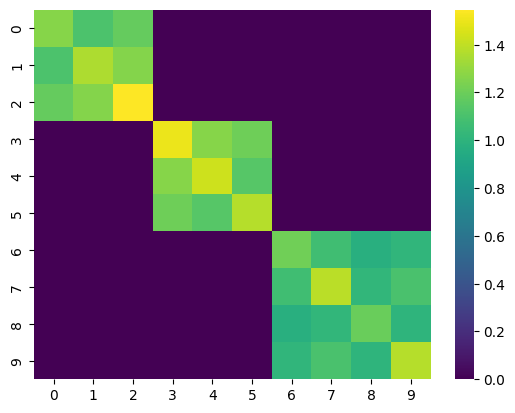

In [6]:
random_block_covariance_matrix  = random_block_covariance(n_columns=10, n_blocks=3, block_size_min=2, sigma=0.5, random_state=None)

sns.heatmap(random_block_covariance_matrix, cmap="viridis")

<Axes: >

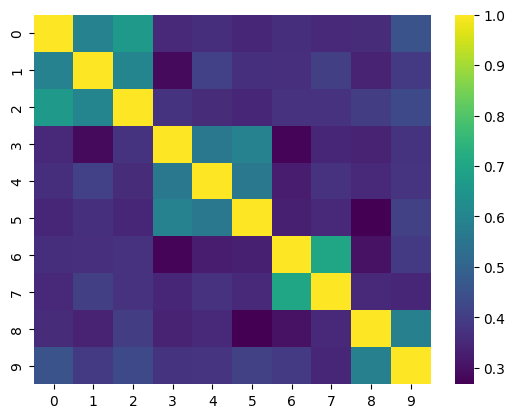

In [7]:
random_block_correlation_matrix = random_block_correlation(10, 4, random_state=None, block_size_min=2)

sns.heatmap(random_block_correlation_matrix, cmap="viridis")